In [16]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# define a pipeline to search for the best combination of PCA truncation and classifier regularization
pca =PCA()
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [18]:
# parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.924):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026007,0.002281,0.000800,4.000903e-04,0.0001,5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",0.677778,0.691667,0.662953,0.774373,0.615599,0.684474,0.051741,20
1,0.023006,0.001674,0.000600,4.897853e-04,0.0001,15,"{'logistic__C': 0.0001, 'pca__n_components': 15}",0.780556,0.761111,0.788301,0.852368,0.732591,0.782985,0.039664,16
2,0.026007,0.001096,0.001000,4.370285e-07,0.0001,30,"{'logistic__C': 0.0001, 'pca__n_components': 30}",0.800000,0.808333,0.802228,0.863510,0.763231,0.807461,0.032192,15
3,0.034209,0.001940,0.000800,4.001380e-04,0.0001,45,"{'logistic__C': 0.0001, 'pca__n_components': 45}",0.808333,0.808333,0.810585,0.871866,0.757660,0.811356,0.036231,13
4,0.028208,0.002040,0.000800,4.001621e-04,0.0001,60,"{'logistic__C': 0.0001, 'pca__n_components': 60}",0.805556,0.808333,0.810585,0.871866,0.757660,0.810800,0.036295,14
5,0.056215,0.001470,0.001200,4.001856e-04,0.046416,5,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.791667,0.738889,0.768802,0.830084,0.735376,0.772963,0.035224,17
6,0.053614,0.001854,0.001001,8.996946e-07,0.046416,15,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.900000,0.877778,0.910864,0.938719,0.857939,0.897060,0.027702,8
7,0.057616,0.004080,0.001000,2.431402e-07,0.046416,30,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.888889,0.927577,0.944290,0.885794,0.913754,0.022783,4
8,0.074020,0.002968,0.001601,4.895712e-04,0.046416,45,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.927778,0.897222,0.941504,0.966574,0.883008,0.923217,0.030092,2
9,0.063819,0.002975,0.001301,3.990945e-04,0.046416,60,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.900000,0.944290,0.966574,0.885794,0.923776,0.029199,1


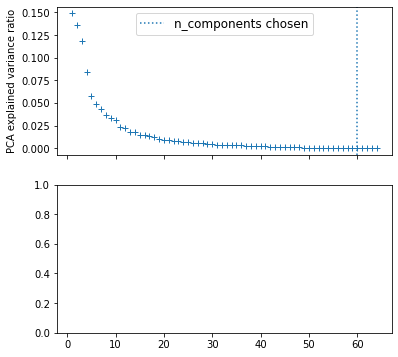

In [20]:
# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
results

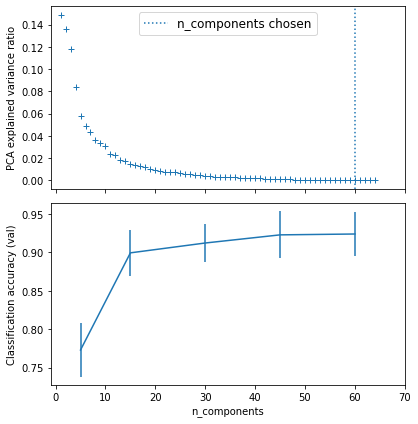

In [ ]:
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()